In [31]:
# Dependencies
import pandas as pd
from scipy.io import loadmat
import glob
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

## Step 1: Load the data.

- Complete the dataset class with the skeleton below.
- Add any transforms you feel are necessary.

Your class should have at least 3 elements
- An ```__init__``` function that sets up your class and all the necessary parameters.
- An ```__len__``` function that returns the size of your dataset.
- An ```__getitem__``` function that given an index within the limits of the size of the dataset returns the associated image and label in tensor form.

You may add more helper functions if you want.

In this section we are following the Pytorch [dataset](https://pytorch.org/vision/stable/datasets.html) class structure. You can take inspiration from their documentation.

In [88]:
# load dataset 
#cycle_nedc = pd.read_csv("../DrivingCycles/Europe/")

dc_folders = ['Europe', 'Japan', 'USA']

# Implement the dataset class
class DrivingCyclesDataset(Dataset):
    def __init__(self,
                 path_to_images,
                 idxs_train,
                 idxs_test,
                 transform_extra=None,
                 img_size=128,
                 train=True):
        # path_to_images: where you put the driving cycles dataset
        # idxs_train: training set indexes
        # idxs_test: test set indexes
        # transform_extra: extra data transform
        # img_size: resize all images to a standard size
        # train: return training set or test set
        
        # Load all the images and their labels
        #### ADD YOUR CODE HERE ####
        alldata = []
        mat = loadmat('./DrivingCycles/WLTPextended.mat')
        data = np.array(mat)
        alldata.append(data)
        for folder in dc_folders:
            image_path = os.path.join(path_to_images, folder)
            files = glob.glob(image_path + '/*.mat')
            for f in files:
                mat = loadmat(f)
                data = np.array(mat)
                alldata.append(mat)

        # Extract the images and labels with the specified file indexes      
        #### ADD YOUR CODE HERE ####
        alldata_np = (np.array(alldata))[p]
        if train==True:
            self.data = alldata_np[:idxs_train]
        else:
            self.data = alldata_np[idxs_test-1:]

    def __len__(self, idx):
        # Return the number of samples in a driving cycle 
        #### ADD YOUR CODE HERE ####
        return (self.data[idx]).size
        
    def __getitem__(self, idx):
        # Get an item using its index
        # Return the driving cycle 
        #### ADD YOUR CODE HERE ####
        sample_data = self.data[idx]
        sample_data = transforms.ToTensor()(sample_data)
        return sample_data

In [76]:
def split_train_test(lendata, percentage=0.8):
    #### ADD YOUR CODE HERE ####
    idxs_train = int(percentage * lendata)
    idxs_test = idxs_train + 1 
    return idxs_train, idxs_test

LENDATA = 36 + 6 + 4 + 1 # number of driving cycles
np.random.seed(42)
idxs_train, idxs_test = split_train_test(LENDATA,0.8)
p = np.random.permutation(int(LENDATA))
print(p)

[27 39 26 43 24 36 12 19  4 25  8  3  6 40 33 13 17 44 15  9 16 29 32 45
  0 31 30  5 11 34  1 41 21  2 35 23 37 10 22 18 46 20  7 42 14 28 38]


## Step 2: Explore the data. (15 Points)

### Step 2.1: Data visualisation. (5 points)

- Plot data distribution, i.e. the number of samples per class.
- Plot 1 sample from each of the five classes in the training set.

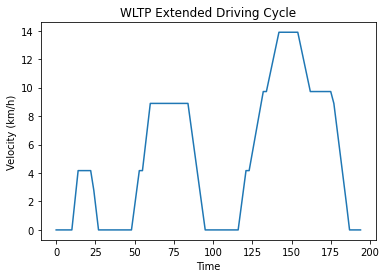

In [91]:
# Training set
img_path = './DrivingCycles/'
dataset  = DrivingCyclesDataset(img_path, idxs_train, idxs_test, None, img_size=128, train=True)

# # Plot the number of samples 
# #### ADD YOUR CODE HERE ####
# dict = {}
# for folder in dc_folders:
#     dict[dc_folders] = dict.get(dc_folders,0)+1

# keys = list(dict.keys())
# values = list(dict.values())

# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i, y[i]//2, y[i], ha = 'center')

# plt.figure(figsize = (10,5))
# plt.bar(range(len(dict)), values, tick_label=keys)
# addlabels(keys,values)
# plt.title("Plot of Number of Samples per Class")
# plt.xlabel("Class")
# plt.ylabel("Number of Samples")
# plt.show() 

# Plot 1 sample from the training set
#### ADD YOUR CODE HERE ####
sample = dataset.data[0]
plt.title("WLTP Extended Driving Cycle")
plt.xlabel("Time")
plt.ylabel("Velocity (km/h)")
plt.plot(sample['V_z'])
plt.show()

## Step 3: Multiclass classification. (55 points)
In this section we will try to make a multiclass classifier to determine the species of the fish.

### Step 3.1: Define the model. (15 points)

Design a neural network which consists of a number of convolutional layers and a few fully connected ones at the end.

The exact architecture is up to you but you do NOT need to create something complicated. For example, you could design a LeNet insprired network.

In [ ]:
class Net(nn.Module):
    def __init__(self, output_dims = 1):
        super(Net, self).__init__()
        #### ADD YOUR CODE HERE ####
        self.output_dims = output_dims
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 5)
        
    def forward(self, x):
        # Forward propagation
        #### ADD YOUR CODE HERE ####
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Step 3.2: Define the training parameters. (10 points)

- Loss function
- Optimizer
- Learning Rate
- Number of iterations
- Batch Size
- Other relevant hyperparameters

In [ ]:
# Network
model = Net()

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimiser and learning rate
lr = 0.001 
optimizer = torch.optim.Adam(model.parameters(), lr) 

# Number of iterations for training
epochs = 20

# Training batch size
train_batch_size = 25

# Based on the FishDataset, use the PyTorch DataLoader to load the data during model training
img_path = './Fish_Dataset/'
train_dataset = FishDataset(img_path, idxs_train, idxs_test, None, img_size=28, train=True)
train_dataloader = DataLoader(train_dataset, batch_size = train_batch_size)
test_dataset = FishDataset(img_path, idxs_train, idxs_test, None, img_size=28, train=False)
test_dataloader = DataLoader(test_dataset)

### Step 3.3: Train the model. (15 points)

Complete the training loop.

In [ ]:
for epoch in tqdm(range(epochs)):
    model.train()
    loss_curve = []
    
    for imgs, labs in train_dataloader:
        # Get a batch of training data and train the model
        #### ADD YOUR CODE HERE ####
        imgs, labs = imgs.to(device), labs.to(device)
        optimizer.zero_grad()
        output = model.forward(imgs)
        loss = criterion(output, labs)
        loss.backward()
        optimizer.step()
        
        loss_curve += [loss.item()]
    print('--- Iteration {0}: training loss = {1:.4f} ---'.format(epoch + 1, np.array(loss_curve).mean()))